In [5]:
!pip install combo

  Preparing metadata (setup.py) ... done
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42855 sha256=2aa4ca6bb992b19b4dcdb218473527e81b6acf2e53959b6dcc8408dbda79297b
  Stored in directory: /root/.cache/pip/wheels/21/e7/9e/8baa8e183e9e3d7e37b74c5c0083462d91fb34123b92abb6ad
Successfully built combo


In [4]:
!pip install pyod

In [6]:
import numpy as np
import pyod as po
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [26]:
#ex1
mean = 2
variance_x = 6
variance_y = 7
a = 6
b = 7
c = 5
size = 150
def leverage(x):
    X = np.column_stack((np.ones_like(x), x))
    U, _, _ = np.linalg.svd(X, full_matrices = False)
    H = U @ U.T
    return np.diag(H)
def leverage2D(x1, x2):
  X = np.column_stack((np.ones(size), x1, x2))
  U, _, _ = np.linalg.svd(X, full_matrices = False)
  H = U @ U.T
  return np.diag(H)

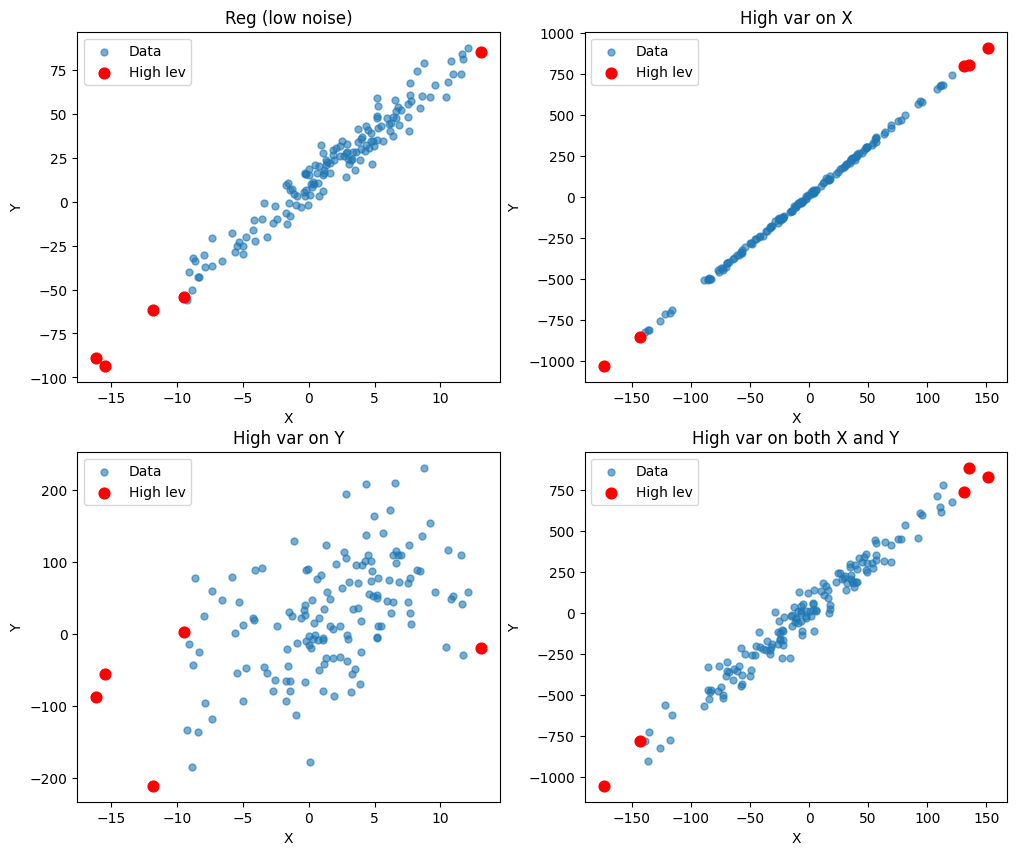

In [29]:
x_reg = np.random.normal(mean, variance_x, size)
x_high    = np.random.normal(mean, variance_x * 10, size)

epsi_reg  = np.random.normal(mean, variance_y, size)
epsi_high     = np.random.normal(mean, variance_y * 10, size)


y_reg        = a * x_reg + b + epsi_reg
y_high_y_variance = a * x_reg + b + epsi_high
y_high_x_variance = a * x_high + b + epsi_reg
y_high_both       = a * x_high + b + epsi_high


lev_reg = leverage(x_reg)
lev_high_y = leverage(x_reg)
lev_high_x = leverage(x_high)
lev_high_both = leverage(x_high)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

datasets = [
    ("Reg (low noise)", x_reg, y_reg, lev_reg),
    ("High var on X", x_high, y_high_x_variance, lev_high_x),
    ("High var on Y", x_reg, y_high_y_variance, lev_high_y),
    ("High var on both X and Y", x_high, y_high_both, lev_high_both),
]


for i, (title, x, y, lev) in enumerate(datasets):
    ax = axes[i]
    ax.scatter(x, y, s=25, alpha=0.6, label="Data")

    top_idx = np.argsort(lev)[-5:]
    ax.scatter(x[top_idx], y[top_idx], color='red', s=60, label='High lev')

    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

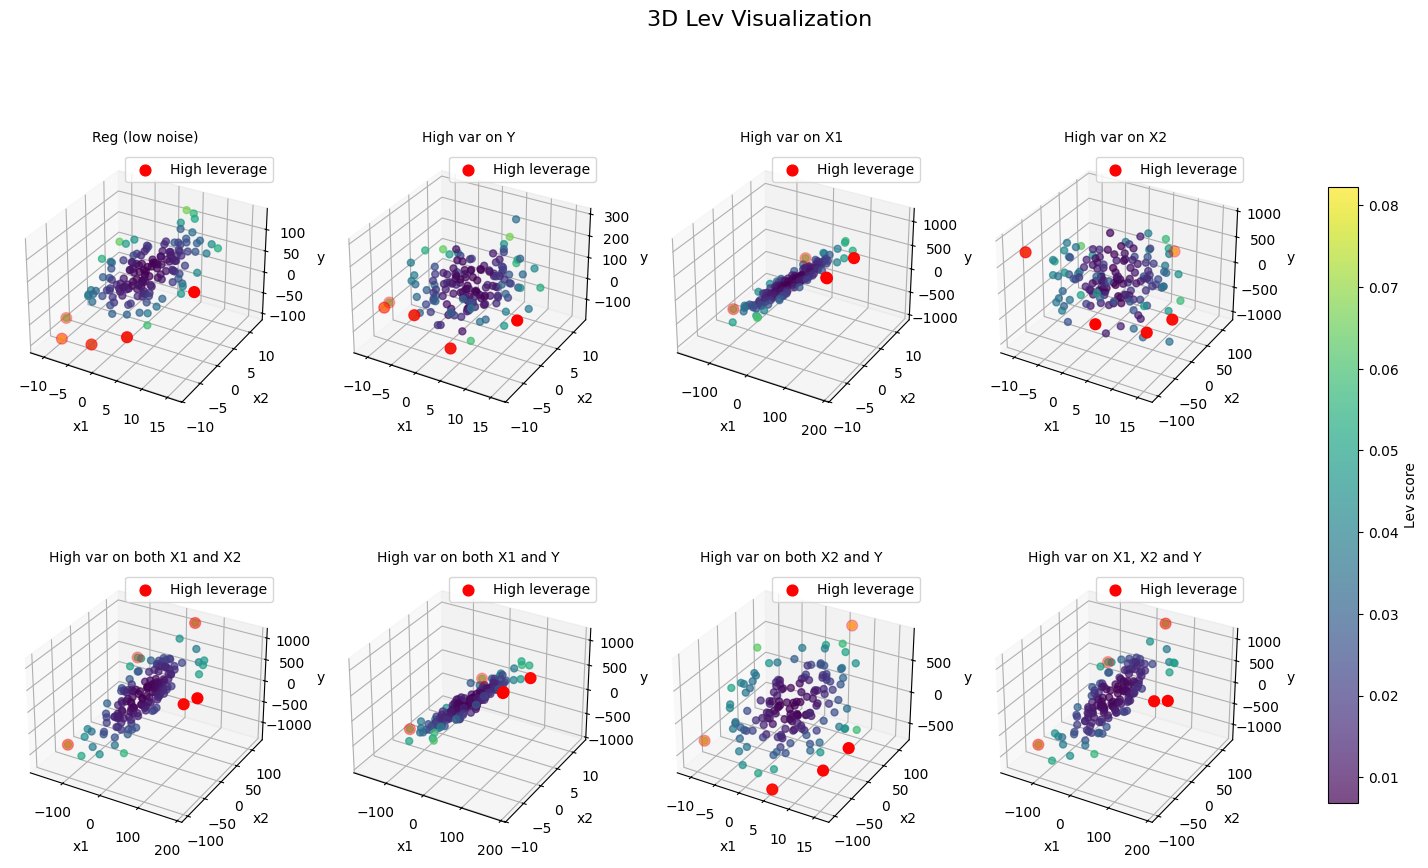

In [30]:
x1_reg = np.random.normal(mean, variance_x, size)
x1_high    = np.random.normal(mean, variance_x * 10, size)


x2_reg = np.random.normal(mean, 4, size)
x2_high    = np.random.normal(mean, 40, size)


epsi_reg  = np.random.normal(mean, variance_y, size)
epsi_high     = np.random.normal(mean, variance_y * 10, size)


y_reg               = a * x1_reg + b * x2_reg + c + epsi_reg
y_high_y_variance   = a * x1_reg + b * x2_reg + c + epsi_high
y_high_x1_variance  = a * x1_high + b * x2_reg + c + epsi_reg
y_high_x2_variance  = a * x1_reg + b * x2_high + c + epsi_reg
y_high_x1_x2        = a * x1_high + b * x2_high + c + epsi_reg
y_high_x1_y         = a * x1_high + b * x2_reg + c + epsi_high
y_high_x2_y         = a * x1_reg + b * x2_high + c + epsi_high
y_high_all          = a * x1_high + b * x2_high + c + epsi_high

lev_reg = leverage2D(x1_reg, x2_reg)
lev_high_y = leverage2D(x1_reg, x2_reg)
lev_high_x1 = leverage2D(x1_high, x2_reg)
lev_high_x2 = leverage2D(x1_reg, x2_high)
lev_high_x1_x2 = leverage2D(x1_high, x2_high)
lev_high_x1_y = leverage2D(x1_high, x2_reg)
lev_high_x2_y = leverage2D(x1_reg, x2_high)
lev_high_all = leverage2D(x1_high, x2_high)


datasets = [
    ("Reg (low noise)", x1_reg, x2_reg, y_reg, lev_reg),
    ("High var on Y", x1_reg, x2_reg, y_high_y_variance, lev_high_y),
    ("High var on X1", x1_high, x2_reg, y_high_x1_variance, lev_high_x1),
    ("High var on X2", x1_reg, x2_high, y_high_x_variance, lev_high_x2),
    ("High var on both X1 and X2", x1_high, x2_high, y_high_x1_x2, lev_high_x1_x2),
    ("High var on both X1 and Y", x1_high, x2_reg, y_high_x1_y, lev_high_x1_y),
    ("High var on both X2 and Y", x1_reg, x2_high, y_high_x2_y, lev_high_x2_y),
    ("High var on X1, X2 and Y", x1_high, x2_high, y_high_all, lev_high_all),
]


fig = plt.figure(figsize=(20, 10))
for i, (title, x1, x2, y, lev) in enumerate(datasets):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')


    p = ax.scatter(x1, x2, y, c=lev, cmap='viridis', s=25, alpha=0.7)


    top_idx = np.argsort(lev)[-5:]
    ax.scatter(x1[top_idx], x2[top_idx], y[top_idx],
               color='red', s=60, label='High leverage')


    ax.set_title(title, fontsize=10)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()


fig.colorbar(p, ax=fig.axes, shrink=0.8, label='Lev score')
plt.suptitle("3D Lev Visualization", fontsize=16)
plt.show()

In [ ]:
#ex2
x_train, x_test, y_train, y_test = po.utils.data.generate_data_clusters(n_train=400, n_test=200, n_features=2, n_clusters=2, contamination=0.1)

knn = KNN(n_neighbors=5)
knn.fit(x_train)

test_predict = knn.predict(x_test)

predicted_labels = knn.labels_


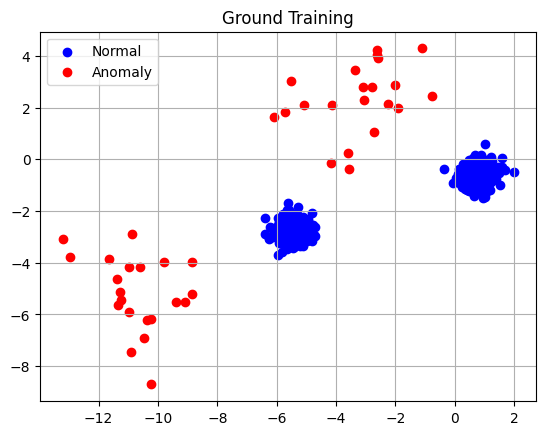

In [ ]:
plt.scatter(
            x_train[y_train == 0, 0],
            x_train[y_train == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            x_train[y_train == 1, 0],
            x_train[y_train == 1, 1],
            label="Anomaly",
            color="red"
        )

plt.title("Ground Training")
plt.legend()
plt.grid(True)
plt.show()

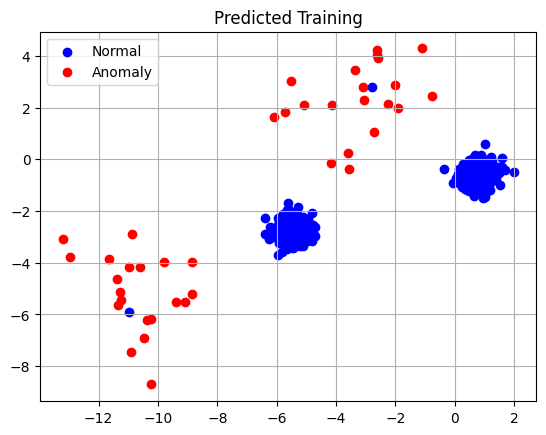

In [ ]:
plt.scatter(
            x_train[predicted_labels == 0, 0],
            x_train[predicted_labels == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            x_train[predicted_labels == 1, 0],
            x_train[predicted_labels == 1, 1],
            label="Anomaly",
            color="red"
        )

plt.title("Predicted Training")
plt.legend()
plt.grid(True)
plt.show()

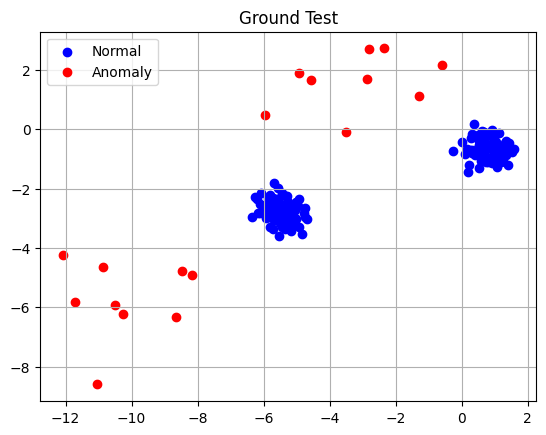

In [ ]:
plt.scatter(
            x_test[y_test == 0, 0],
            x_test[y_test == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            x_test[y_test == 1, 0],
            x_test[y_test == 1, 1],
            label="Anomaly",
            color="red"
        )

plt.title("Ground Test")
plt.legend()
plt.grid(True)
plt.show()

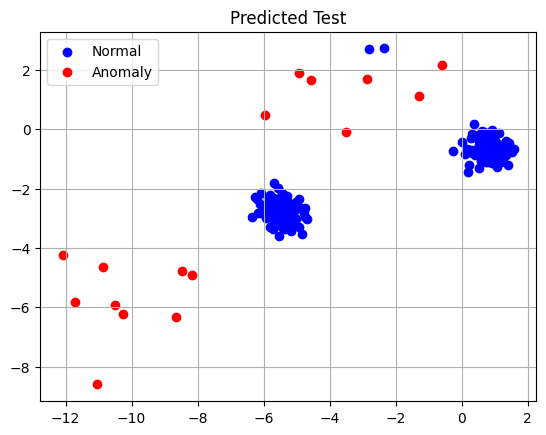

In [ ]:
plt.scatter(
            x_test[test_predict == 0, 0],
            x_test[test_predict == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            x_test[test_predict == 1, 0],
            x_test[test_predict == 1, 1],
            label=f"Anomaly",
            color="red"
        )

plt.title("Predicted Test")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
balanced_accuracy_score(y_test, test_predict)

np.float64(0.9444444444444444)

In [ ]:
x_train, x_test, y_train, y_test = po.utils.data.generate_data_clusters(n_train=400, n_test=200, n_features=2, n_clusters=2, contamination=0.1)

knn = KNN(n_neighbors=3)
knn.fit(x_train)

test_predict = knn.predict(x_test)

predicted_labels = knn.labels_

balanced_accuracy_score(y_test, test_predict)

np.float64(0.8731211317418215)

In [ ]:
x_train, x_test, y_train, y_test = po.utils.data.generate_data_clusters(n_train=400, n_test=200, n_features=2, n_clusters=2, contamination=0.1)

knn = KNN(n_neighbors=1)
knn.fit(x_train)

test_predict = knn.predict(x_test)

predicted_labels = knn.labels_

balanced_accuracy_score(y_test, test_predict)

np.float64(0.8342857142857143)

In [ ]:
x_train, x_test, y_train, y_test = po.utils.data.generate_data_clusters(n_train=400, n_test=200, n_features=2, n_clusters=2, contamination=0.1)

knn = KNN(n_neighbors=7)
knn.fit(x_train)

test_predict = knn.predict(x_test)

predicted_labels = knn.labels_

balanced_accuracy_score(y_test, test_predict)

np.float64(0.994413407821229)

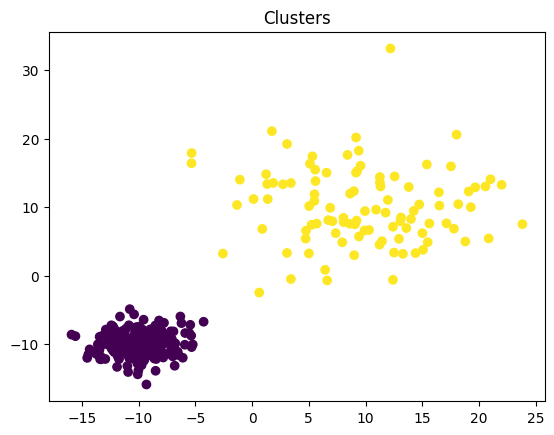

In [ ]:
#ex3
X,y = sk.datasets.make_blobs(n_samples=[200,100],cluster_std=[2,6],centers=[(-10,-10),(10,10)])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Clusters")
plt.show()

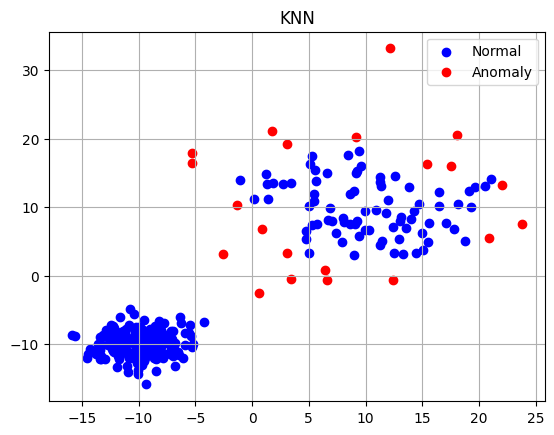

In [ ]:
knn = KNN(contamination=0.07)
knn.fit(X)

predicted_labels = knn.labels_

plt.scatter(
            X[predicted_labels == 0, 0],
            X[predicted_labels == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            X[predicted_labels == 1, 0],
            X[predicted_labels == 1, 1],
            label="Anomaly",
            color="red"
        )

plt.title("KNN")
plt.legend()
plt.grid(True)
plt.show()

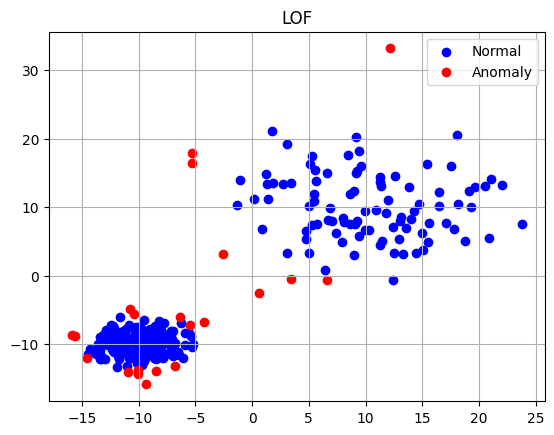

In [ ]:
lof = LOF(contamination=0.07)
lof.fit(X)

predicted_labels = lof.labels_

plt.scatter(
            X[predicted_labels == 0, 0],
            X[predicted_labels == 0, 1],
            label="Normal",
            color="blue"
        )
plt.scatter(
            X[predicted_labels == 1, 0],
            X[predicted_labels == 1, 1],
            label="Anomaly",
            color="red"
        )

plt.title("LOF")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
#ex4
data = loadmat("cardio.mat")

X = data["X"]
y = data["y"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

neighbors_range = range(30,121,10)

train_scores_knn = []
test_scores_knn = []

for n in neighbors_range:
    model = KNN(n_neighbors=n)
    model.fit(X_train)


    train_scores_knn.append(model.decision_scores_)
    test_scores_knn.append(model.decision_function(X_test))


    y_train_pred = model.labels_
    y_test_pred = model.predict(X_test)

    ba_train = balanced_accuracy_score(y_train, y_train_pred)
    ba_test = balanced_accuracy_score(y_test, y_test_pred)

    print(f"KNN(neighbors={n}): ba_train={ba_train:.3f}, ba_test={ba_test:.3f}")

train_scores_lof = []
test_scores_lof = []

for n in neighbors_range:
    model = LOF(n_neighbors=n)
    model.fit(X_train)


    train_scores_lof.append(model.decision_scores_)
    test_scores_lof.append(model.decision_function(X_test))


    y_train_pred = model.labels_
    y_test_pred = model.predict(X_test)

    ba_train = balanced_accuracy_score(y_train, y_train_pred)
    ba_test = balanced_accuracy_score(y_test, y_test_pred)

    print(f"LOF(neighbors={n}): ba_train={ba_train:.3f}, ba_test={ba_test:.3f}")



KNN(neighbors=30): ba_train=0.706, ba_test=0.683
KNN(neighbors=40): ba_train=0.724, ba_test=0.694
KNN(neighbors=50): ba_train=0.733, ba_test=0.733
KNN(neighbors=60): ba_train=0.733, ba_test=0.733
KNN(neighbors=70): ba_train=0.742, ba_test=0.742
KNN(neighbors=80): ba_train=0.751, ba_test=0.752
KNN(neighbors=90): ba_train=0.751, ba_test=0.752
KNN(neighbors=100): ba_train=0.755, ba_test=0.752
KNN(neighbors=110): ba_train=0.755, ba_test=0.762
KNN(neighbors=120): ba_train=0.755, ba_test=0.772
LOF(neighbors=30): ba_train=0.539, ba_test=0.559
LOF(neighbors=40): ba_train=0.539, ba_test=0.552
LOF(neighbors=50): ba_train=0.548, ba_test=0.559
LOF(neighbors=60): ba_train=0.562, ba_test=0.579
LOF(neighbors=70): ba_train=0.589, ba_test=0.591
LOF(neighbors=80): ba_train=0.616, ba_test=0.614
LOF(neighbors=90): ba_train=0.643, ba_test=0.622
LOF(neighbors=100): ba_train=0.661, ba_test=0.625
LOF(neighbors=110): ba_train=0.674, ba_test=0.637
LOF(neighbors=120): ba_train=0.692, ba_test=0.650


In [46]:
train_scores_norm_knn, test_scores_norm_knn = standardizer(np.array(train_scores_knn).T, np.array(test_scores_knn).T)
train_scores_norm_lof, test_scores_norm_lof = standardizer(np.array(train_scores_lof).T, np.array(test_scores_lof).T)


combined_avg_knn = average(test_scores_norm_knn)
combined_avg_lof = average(test_scores_norm_lof)

#print(combined_avg_knn)

combined_max_knn = maximization(test_scores_norm_knn)
combined_max_lof = maximization(test_scores_norm_lof)

#print(combined_max_knn)

contamination = 0.096


thresh_avg_knn = np.quantile(combined_avg_knn, 1 - contamination)
thresh_avg_lof = np.quantile(combined_avg_lof, 1 - contamination)

thresh_max_knn = np.quantile(combined_max_knn, 1 - contamination)
thresh_max_lof = np.quantile(combined_max_lof, 1 - contamination)


y_pred_avg_knn = (combined_avg_knn > thresh_avg_knn).astype(int)
y_pred_avg_lof = (combined_avg_lof > thresh_avg_lof).astype(int)
#print(y_pred_avg_knn)
y_pred_max_knn = (combined_max_knn > thresh_max_knn).astype(int)
y_pred_max_lof = (combined_max_lof > thresh_max_lof).astype(int)


ba_avg_knn = balanced_accuracy_score(y_test, y_pred_avg_knn)
ba_avg_lof = balanced_accuracy_score(y_test, y_pred_avg_lof)

ba_max_knn = balanced_accuracy_score(y_test, y_pred_max_knn)
ba_max_lof = balanced_accuracy_score(y_test, y_pred_max_lof)

print(f"Average Strategy KNN: Threshold={thresh_avg_knn:.3f}, ba_test={ba_avg_knn:.3f}")
print(f"Max Strategy KNN:     Threshold={thresh_max_knn:.3f}, ba_test={ba_max_knn:.3f}")

print(f"Average Strategy LOF: Threshold={thresh_avg_lof:.3f}, ba_test={ba_avg_lof:.3f}")
print(f"Max Strategy LOF:     Threshold={thresh_max_lof:.3f}, ba_test={ba_max_lof:.3f}")


Average Strategy KNN: Threshold=0.944, ba_test=0.770
Max Strategy KNN:     Threshold=1.028, ba_test=0.770
Average Strategy LOF: Threshold=0.719, ba_test=0.593
Max Strategy LOF:     Threshold=0.988, ba_test=0.635
